When I was an undergraduate at UC Berkeley, I breezed through several exercises in a class I took on computer
simulations. The one that stumped me the most was the simulation of a standard 2-body Keplerian orbit. For some reason, I could not, for the life of me, replicate an ellipse. Many of my simulations returned a straight line between the two celestial bodies. 

Recently, I asked one of my friends and colleagues why I was having such difficulty. That was when I took seriously the usefulness of creating classes and assigning properties to objects. I already had an idea of why I was having such a difficult time replicating the ellipse: it was because of geometry. I needed to take into account the direction of forces (something I could easily add in later whenever I did calculations on paper, but could not as easily overlook when I needed to apply the physical concept). Even when I attempted to account for the directions, I was coming up with unexpected shapes. That was when I remembered that the frame of reference I was viewing the problem from also mattered; it is crucial.

For students and self-guided learners who encounter difficulty with this, often-called "simple", exercise, I hope my realizations will help you learn easier. This exercise is, in fact, simple, if and once you understand the role geometry plays in applying forces and velocities correctly. If this is where you struggle, I would recommend taking a look at the function "calculate_step", where a, v_x, and v_y are calculated.

As of the time of this early commit, this program still has some bugs. For example, I have converted my time units so that they should all be in meters, kilograms, and hours. I have iterated my simulation for 8760 hours, which is approximately the number of hours in one year. I would expect my simulation to have a little under a full rotation, if not a single, full rotation. However, the distance travelled is more than I would expect. Is this a problem with my expectations, or did I perhaps miss a unit, a number, a minor calculation? It is part of the learning process, and I expect to find my error sooner or later.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20) #Changes the default size of plotted figures.


Say we have a central body M1, and a secondary body M2 enters a circular area with radius R with a velocity of v.
When this body enters the area, it will encounter the gravitational force field exuded by the central body M1.
This force will pull the body M2 inward, but with a high enough v (assuming an inertial frame), the secondary body
should be able to maintain an elliptical orbit, instead of falling inward.
With too high of a v, though, the secondary body will continue on its course unimpeded, and will only be slightly
diverted in its trajectory.

How do we plot this?
We look at how the gravitational force will impact the vertical and horizontal direction of the seconary body.
In reality, we would have to account for 3 possible axes of movement, but for simplicity, we will focus on a 
2-dimensional simulation.



In [2]:
#G = 6.674 * 10 ** (-11) * (3600 * 24) ** 2 #m^3 kg^-1 day^-2
G = 6.674 * 10 ** (-11) * (3600 ** 2) #m^3 kg^-1 hr^-2
#G = 6.674 * 10 ** (-11) ##m^3 kg^-1 s^-2

#Standard Distance Equation
def calc_distance(body1, body2):
    R = np.sqrt((body1.x_position - body2.x_position)**2 + (body1.y_position - body2.y_position)**2)
    return R
#Newtonian equations of motion for velocity and position.
def update_velocity(velocity, acceleration, timestep):
    new_velocity = velocity + (acceleration * timestep)
    return new_velocity
def update_position(x, y, v_x, v_y, timestep):
    new_x = x + v_x*timestep
    new_y = y + v_y*timestep
    return new_x, new_y

#The heart of the simulation.
def calculate_step(central_body, orbitting_body, t = 1):
    #t = timestep. Sets default timestep to 1 unit. Current time units are hours.
    R = calc_distance(central_body, orbitting_body)
    a = -G * central_body.mass * np.abs(R ** (-2)) #Acceleration assuming the only force is gravity acting on the planet
    #Attempting to account for directionality by using positions of two bodies instead of guessing or using trig    
    v_x = orbitting_body.velocity * -(central_body.y_position - orbitting_body.y_position)/R
    v_y = orbitting_body.velocity * (central_body.x_position - orbitting_body.x_position)/R
    orbitting_body.x_position, orbitting_body.y_position = update_position(orbitting_body.x_position, orbitting_body.y_position, v_x, v_y, t)
    orbitting_body.velocity = update_velocity(orbitting_body.velocity, a, t)
    return orbitting_body.x_position, orbitting_body.y_position
    
class body:
    global G
    def __init__(self, name, mass, x_position, y_position, velocity):
        self.name = name
        self.mass = mass
        self.x_position = x_position
        self.y_position = y_position
        self.velocity = velocity
        





In [3]:
#Initial Conditions
M1 = 1.9091 * 10 ** 30 #kg #solar mass
M2 = 5.9724 * 10 ** 24 #kg #earth mass

v = (30.29 * 10**3)* 3600# hr/day
x = 147.09 * 10**9#m
y = 0 #m

Sun = body("Sun", M1, 0, 0, 0)
Earth = body("Earth", M2, x, y, v)

In [4]:
#Creating arrays to store the data points to be plotted
earth_y_pos = []
earth_x_pos = []
sun_y_pos = []
sun_x_pos = []
x_0 = Earth.x_position
y_0 = Earth.y_position

#Run Simulation
for t in range(8760):
    earth_x, earth_y = calculate_step(Sun, Earth)
    sun_x, sun_y = calculate_step(Earth, Sun)
    earth_y_pos.append(earth_y)
    earth_x_pos.append(earth_x)
    sun_y_pos.append(sun_y)
    sun_x_pos.append(sun_x)
    


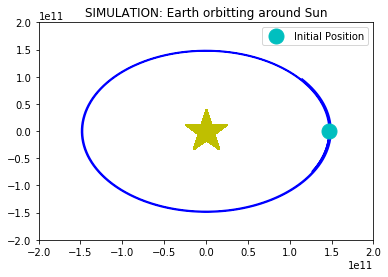

In [5]:
plt.plot(earth_x_pos, earth_y_pos, 'b-')
plt.plot(sun_x_pos, sun_y_pos, 'y*', markersize = 45)
plt.plot(x_0, y_0, 'co', markersize = 15, label = "Initial Position")

#Lock the Axes so it does not change with the values plotted
plt.xlim(-2 * 10 ** 11, 2 * 10**11)
plt.ylim(-2 * 10 ** 11, 2 * 10**11)


plt.title("SIMULATION: {:s}".format(Earth.name) + " orbitting around {:s}".format(Sun.name))
plt.legend()
plt.show()